In [10]:
from joblib import load

# Load the model
model = load('stacking_clf.joblib')

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv("unknowndataset.csv")
df

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,143,0.000000,0.00,45.59,62.08,35.445971,35.445971,0.0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5882.52,510.66,578.00,564.254681,26.835848,562.46,83573787.60,9.5,33.572584,38.007082,5598.400724,0.13,141.55
1,4528,0.002190,4.78,46.59,64.00,21.065130,21.065130,0.0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.02,0.02,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6018.60,527.60,578.00,573.229620,14.340596,574.85,83663868.49,9.5,33.857185,20.304507,1333.798015,0.16,141.55
2,18979,0.001110,1.59,46.12,63.20,17.030552,17.030552,0.0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.01,0.02,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5980.10,489.10,578.00,571.166435,23.278806,567.58,83581838.37,9.5,33.794056,33.000070,3278.584513,0.17,141.55
3,15862,0.031130,26.74,45.72,64.00,5.043963,5.043963,0.0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.04,0.12,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6068.94,554.00,615.44,577.977727,11.578778,578.06,83647521.07,9.5,33.999142,16.468855,2883.792403,0.05,141.55
4,8215,0.000387,1.16,46.12,63.13,49.146224,49.146224,0.0,0,0,0,0,0,0,0,0.0,0.02,0.0,0.00,0.01,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5944.50,453.50,578.00,568.186491,32.937297,567.62,83573722.01,9.5,33.704416,46.658936,4643.353718,0.24,141.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,769,0.000000,0.00,47.00,64.00,12.608419,12.608419,0.0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,83650969.57,9.5,34.000000,0.000000,0.000000,0.00,141.55
3897,7158,0.001985,3.38,46.70,63.81,10.374577,10.374577,0.0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6028.31,537.31,578.00,574.854718,10.735791,574.87,83650863.15,9.5,33.906168,15.206391,904.134170,0.13,141.55
3898,8146,0.131170,133.20,45.71,63.95,1.974940,1.974940,0.0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.15,0.27,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5973.46,495.12,592.34,569.353712,28.838978,573.10,83663765.09,9.5,33.736936,40.867992,4524.260520,0.19,141.55
3899,10891,0.020118,1.48,46.59,65.73,2.035338,2.035338,0.0,0,0,0,0,0,0,0,0.0,0.02,0.0,0.00,0.02,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6028.68,537.68,578.00,575.507574,9.682401,572.96,83663772.63,9.5,33.925257,13.731130,1182.962341,0.08,141.55


In [13]:
df.dtypes

Unnamed: 0           int64
flow_duration      float64
Header_Length      float64
Protocol Type      float64
Duration           float64
Rate               float64
Srate              float64
Drate              float64
fin_flag_number      int64
syn_flag_number      int64
rst_flag_number      int64
psh_flag_number      int64
ack_flag_number      int64
ece_flag_number      int64
cwr_flag_number      int64
ack_count          float64
syn_count          float64
fin_count          float64
urg_count          float64
rst_count          float64
HTTP                 int64
HTTPS                int64
DNS                  int64
Telnet               int64
SMTP                 int64
SSH                  int64
IRC                  int64
TCP                  int64
UDP                  int64
DHCP                 int64
ARP                  int64
ICMP                 int64
IPv                  int64
LLC                  int64
Tot sum            float64
Min                float64
Max                float64
A

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3901 non-null   int64  
 1   flow_duration    3901 non-null   float64
 2   Header_Length    3901 non-null   float64
 3   Protocol Type    3901 non-null   float64
 4   Duration         3901 non-null   float64
 5   Rate             3901 non-null   float64
 6   Srate            3901 non-null   float64
 7   Drate            3901 non-null   float64
 8   fin_flag_number  3901 non-null   int64  
 9   syn_flag_number  3901 non-null   int64  
 10  rst_flag_number  3901 non-null   int64  
 11  psh_flag_number  3901 non-null   int64  
 12  ack_flag_number  3901 non-null   int64  
 13  ece_flag_number  3901 non-null   int64  
 14  cwr_flag_number  3901 non-null   int64  
 15  ack_count        3901 non-null   float64
 16  syn_count        3901 non-null   float64
 17  fin_count     

In [15]:
df.describe()

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,3901.000000,3901.000000,3.901000e+03,3901.000000,3901.000000,3.901000e+03,3.901000e+03,3901.0,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.0,3901.0,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.0,3901.0,3901.000000,3901.0,3901.000000,3901.000000,3901.0,3901.0,3901.0,3901.0,3901.0,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3.901000e+03,3901.000000,3901.000000,3901.000000,3.901000e+03,3901.000000,3901.000000
mean,9926.654448,64.347045,2.419170e+04,40.578582,69.524836,1.005610e+04,1.005610e+04,0.0,0.000513,0.012305,0.011023,0.003332,0.097667,0.0,0.0,0.020749,0.139264,0.017285,11.548205,40.993355,0.003332,0.051782,0.001538,0.0,0.0,0.003845,0.0,0.117406,0.011279,0.0,0.0,0.0,1.0,1.0,5578.925697,460.334954,619.415279,531.467990,53.182203,533.058536,8.401602e+07,9.520584,31.834077,75.117202,3.926133e+04,0.219731,142.075371
std,5619.537280,1708.848982,1.881787e+05,13.449477,19.344240,1.066250e+05,1.066250e+05,0.0,0.022640,0.110255,0.104423,0.057639,0.296902,0.0,0.0,0.114344,0.402742,0.122144,63.196967,219.510168,0.057639,0.221614,0.039193,0.0,0.0,0.061898,0.0,0.321944,0.105616,0.0,0.0,0.0,0.0,0.0,1979.177899,175.640665,469.928474,191.115614,169.059363,191.867162,3.025170e+07,1.453377,6.618973,239.124503,3.294660e+05,0.300431,37.361385
min,1.000000,0.000000,0.000000e+00,3.600000,1.800000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,294.600000,42.000000,54.000000,53.512857,0.000000,54.000000,1.690000e-06,1.000000,10.345230,0.000000,0.000000e+00,0.000000,1.000000
25%,5161.000000,0.000000,0.000000e+00,44.830000,64.000000,2.795430e+00,2.795430e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,5870.620000,432.980000,578.000000,557.919101,0.000000,558.980000,8.358155e+07,9.500000,33.348939,0.000000,0.000000e+00,0.000000,141.550000
50%,10042.000000,0.000000,9.900000e-01,46.530000,64.000000,1.208181e+01,1.208181e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,6019.000000,525.600000,578.000000,574.758936,12.872179,572.820000,8.364675e+07,9.500000,33.901131,18.199987,1.454565e+03,0.110000,141.550000
75%,14776.000000,0.030143,1.616000e+01,47.000000,65.910000,4.206067e+01,4.206067e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.010000,0.000000,0.010000,0.050000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,6069.000000,578.000000,578.000000,578.000000,39.259422,578.000000,8.365095e+07,9.500000,34.000000,55.299461,6.028508e+03,0.280000,141.550000
max,19498.000000,99435.761780,7.411406e+06,47.000000,255.000000,2.097152e+06,2.097152e+06,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.900000,5.300000,2.500000,1013.800000,5612.350000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,30201.900000,1977.900000,11650.000000,4401.320754,3705.468296,2867.100000,1.666019e+08,13.500000,90.705110,5240.323519,1.560328e+07,1.000000,244.600000


In [16]:
df.drop(['Unnamed: 0','Drate','ece_flag_number','cwr_flag_number','Telnet','SMTP','IRC','DHCP'], axis=1, inplace=True)
df
#"Unnamed:0" is timestamps unrelated to our data. Rest of all have all zero entries in the dataset. Dropping all these columns 

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,SSH,TCP,UDP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,0.00,45.59,62.08,35.445971,35.445971,0,0,0,0,0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,1,1,5882.52,510.66,578.00,564.254681,26.835848,562.46,83573787.60,9.5,33.572584,38.007082,5598.400724,0.13,141.55
1,0.002190,4.78,46.59,64.00,21.065130,21.065130,0,0,0,0,0,0.0,0.00,0.0,0.02,0.02,0,0,0,0,0,0,0,0,1,1,6018.60,527.60,578.00,573.229620,14.340596,574.85,83663868.49,9.5,33.857185,20.304507,1333.798015,0.16,141.55
2,0.001110,1.59,46.12,63.20,17.030552,17.030552,0,0,0,0,0,0.0,0.00,0.0,0.01,0.02,0,0,0,0,0,0,0,0,1,1,5980.10,489.10,578.00,571.166435,23.278806,567.58,83581838.37,9.5,33.794056,33.000070,3278.584513,0.17,141.55
3,0.031130,26.74,45.72,64.00,5.043963,5.043963,0,0,0,0,0,0.0,0.00,0.0,0.04,0.12,0,0,0,0,0,0,0,0,1,1,6068.94,554.00,615.44,577.977727,11.578778,578.06,83647521.07,9.5,33.999142,16.468855,2883.792403,0.05,141.55
4,0.000387,1.16,46.12,63.13,49.146224,49.146224,0,0,0,0,0,0.0,0.02,0.0,0.00,0.01,0,0,0,0,0,0,0,0,1,1,5944.50,453.50,578.00,568.186491,32.937297,567.62,83573722.01,9.5,33.704416,46.658936,4643.353718,0.24,141.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,0.000000,0.00,47.00,64.00,12.608419,12.608419,0,0,0,0,0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6069.00,578.00,578.00,578.000000,0.000000,578.00,83650969.57,9.5,34.000000,0.000000,0.000000,0.00,141.55
3897,0.001985,3.38,46.70,63.81,10.374577,10.374577,0,0,0,0,0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,1,1,6028.31,537.31,578.00,574.854718,10.735791,574.87,83650863.15,9.5,33.906168,15.206391,904.134170,0.13,141.55
3898,0.131170,133.20,45.71,63.95,1.974940,1.974940,0,0,0,0,0,0.0,0.00,0.0,0.15,0.27,0,0,0,0,0,0,0,0,1,1,5973.46,495.12,592.34,569.353712,28.838978,573.10,83663765.09,9.5,33.736936,40.867992,4524.260520,0.19,141.55
3899,0.020118,1.48,46.59,65.73,2.035338,2.035338,0,0,0,0,0,0.0,0.02,0.0,0.00,0.02,0,0,0,0,0,0,0,0,1,1,6028.68,537.68,578.00,575.507574,9.682401,572.96,83663772.63,9.5,33.925257,13.731130,1182.962341,0.08,141.55


In [17]:

df.drop(['Srate','LLC','Number','Std','IAT'], axis=1, inplace=True)

In [18]:
df.drop(['ack_flag_number','Max','AVG'], axis=1, inplace=True)

In [23]:
len(df.columns)

31

In [24]:
prediction = model.predict(df)

In [28]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
series = pd.Series(prediction)
series.value_counts()

1    3391
2     470
0      40
Name: count, dtype: int64

In [32]:
def convert_name(name):
    # Your conversion logic here
    if name == 0:
        return 'DictionaryBruteForce'
    elif name == 1:
        return 'Mirai-greip_flood'
    elif name == 2:
        return 'Recon-OSScan'
    else:
        return name  # Handle unknown values

converted_series = series.map(convert_name)

In [34]:
merged_df = df.assign(label=converted_series)

<Axes: >

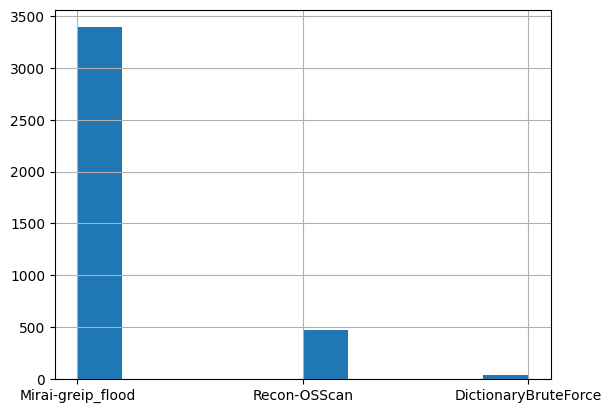

In [35]:
merged_df['label'].hist()

In [36]:

with pd.ExcelWriter("Predictions.xlsx") as writer:
    df.to_excel(writer, sheet_name="1A")